(19.69615506024416, 3.4729635533386065)


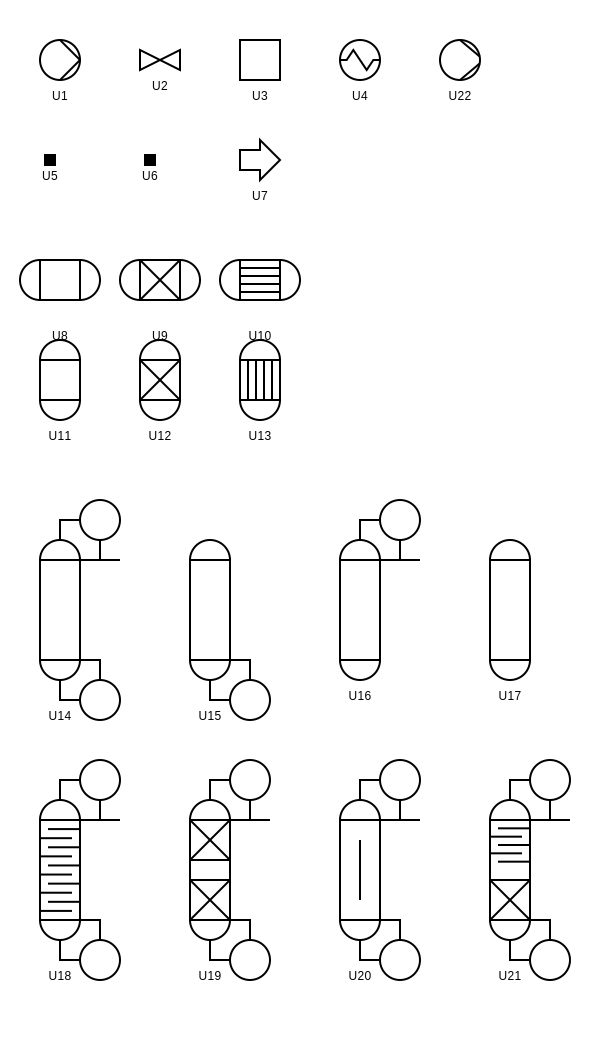

In [1]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger,Mixer, Splitter, Compressor, SvgContext
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment
from pyflowsheet.internals import Tubes, CatalystBed, Trays, DividingWall, RandomPacking
from IPython.core.display import SVG, HTML

pfd= Flowsheet("Demo","Simple Distillation", "Demo Flowsheet for showing different unit operations")

pfd.unit(Pump("U1","Unspecified Pump", position=(0,100)))
pfd.unit(Valve("U2","Manual Valve", position=(100,110),size=(40,20)))
pfd.unit(BlackBox("U3","Black-Box/Process Step", position=(200,100), size=(40,40)))
pfd.unit(HeatExchanger("U4","Two-way heat exchanger", position=(300,100), size=(40,40)))
pfd.unit(Compressor("U22","Compressor", position=(400,100), size=(40,40)))

pfd.unit(Mixer("U5","Mixer", position=(0,210)))
pfd.unit(Splitter("U6","Splitter", position=(100,210)))
pfd.unit(StreamFlag("U7","Off-Page Connector", position=(200,200)))

pfd.unit(Vessel("U8","Horizontal Vessel", position=(0,300), angle=90, size=(40,80) ))
pfd.unit(Vessel("U9","Horizontal Vessel (bed)", position=(100,300),  angle=90, size=(40,80),internals=[CatalystBed()] ))
pfd.unit(Vessel("U10","Horizontal Vessel (tubes)", position=(200,300),  angle=90, size=(40,80),internals=[Tubes()] ))

pfd.unit(Vessel("U11","Vertical Vessel", position=(0,400),  size=(40,80) ))
pfd.unit(Vessel("U12","Vertical Vessel (bed)", position=(100,400), size=(40,80),internals=[CatalystBed()] ))
pfd.unit(Vessel("U13","Vertical Vessel (tubes)", position=(200,400), size=(40,80),internals=[Tubes()] ))

pfd.unit(Distillation("U14","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(0,600), size=(40,140) ))

pfd.unit(Distillation("U15","Distillation Tower", hasCondenser=False, hasReboiler=True,position=(150,600), size=(40,140) ))

pfd.unit(Distillation("U16","Distillation Tower", hasCondenser=True, hasReboiler=False,position=(300,600), size=(40,140)))

pfd.unit(Distillation("U17","Distillation Tower", hasCondenser=False, hasReboiler=False,position=(450,600), size=(40,140)))

pfd.unit(Distillation("U18","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(0,860), size=(40,140),internals=[Trays(start=0, end=1)] ))
pfd.unit(Distillation("U19","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(150,860), size=(40,140),internals=[RandomPacking(start=0, end=0.4),RandomPacking(start=0.6, end=1.0)] ))
pfd.unit(Distillation("U20","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(300,860), size=(40,140),internals=[DividingWall()] ))
pfd.unit(Distillation("U21","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(450,860), size=(40,140),internals=[Trays(start=0, end=0.5, numberOfTrays=6),RandomPacking(start=0.6, end=1.0)] ))

ctx= SvgContext("../img/unit_operations_example.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))

